In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [72]:
df = pd.read_csv(r'C:\Users\prafulla.kamble\Downloads\0PRK\ML\CodeBasicsRepo\ML\14_naive_bayes\titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [73]:
target = df.Survived
inputs = df.drop('Survived',axis='columns')
inputs

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C


In [74]:
inputs = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns')
inputs

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [75]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [76]:
inputs = pd.concat([inputs, dummies],axis='columns')
inputs.head(15)

,Pclass,Sex,Age,Fare,Survived,female,male
0,3,male,22.0,7.2500,0,0,1
1,1,female,38.0,71.2833,1,1,0
2,3,female,26.0,7.9250,1,1,0
3,1,female,35.0,53.1000,1,1,0
4,3,male,35.0,8.0500,0,0,1
5,3,male,NaN,8.4583,0,0,1
6,1,male,54.0,51.8625,0,0,1
7,3,male,2.0,21.0750,0,0,1
8,3,female,27.0,11.1333,1,1,0
9,2,female,14.0,30.0708,1,1,0


In [77]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,Survived,female,male
0,3,22.0,7.2500,0,0,1
1,1,38.0,71.2833,1,1,0
2,3,26.0,7.9250,1,1,0
3,1,35.0,53.1000,1,1,0
4,3,35.0,8.0500,0,0,1


In [78]:
# Find NAs in all the columns

inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [80]:
inputs.Age.mean()

29.69911764705882

In [81]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(15)

,Pclass,Age,Fare,Survived,female,male
0,3,22.000000,7.2500,0,0,1
1,1,38.000000,71.2833,1,1,0
2,3,26.000000,7.9250,1,1,0
3,1,35.000000,53.1000,1,1,0
4,3,35.000000,8.0500,0,0,1
5,3,29.699118,8.4583,0,0,1
6,1,54.000000,51.8625,0,0,1
7,3,2.000000,21.0750,0,0,1
8,3,27.000000,11.1333,1,1,0
9,2,14.000000,30.0708,1,1,0


In [82]:
from sklearn.model_selection import train_test_split

In [135]:
X_train,X_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2)

In [136]:
len(X_train)

712

In [137]:
len(y_train)

712

In [138]:
len(X_test)

179

In [139]:
len(y_test)

179

In [140]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [141]:
model.fit(X_train,y_train)

GaussianNB()

In [142]:
model.score(X_test,y_test)

1.0

In [143]:
X_test[:10]

,Pclass,Age,Fare,Survived,female,male
754,2,48.000000,65.0000,1,1,0
807,3,18.000000,7.7750,0,1,0
179,3,36.000000,0.0000,0,0,1
438,1,64.000000,263.0000,0,0,1
680,3,29.699118,8.1375,0,1,0
322,2,30.000000,12.3500,1,1,0
774,2,54.000000,23.0000,1,1,0
539,1,22.000000,49.5000,1,1,0
263,1,40.000000,0.0000,0,0,1
809,1,33.000000,53.1000,1,1,0


In [146]:
y_test[10:20]

452    0
498    0
562    0
10     1
482    0
763    1
221    0
455    1
571    1
550    1
Name: Survived, dtype: int64

In [148]:
model.predict(X_test[10:20])

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [151]:
model.predict_proba(X_test[10:20]) 
# [didn't survive, survived]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [152]:
df = pd.read_csv(r'C:\Users\prafulla.kamble\Downloads\0PRK\ML\CodeBasicsRepo\ML\14_naive_bayes\spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [154]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [197]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X_train,X_test,y_train,y_test = train_test_split(df.Message,df.spam,test_size=0.25)

In [200]:
# CountVectorizer() to convert Category

from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Types and differences

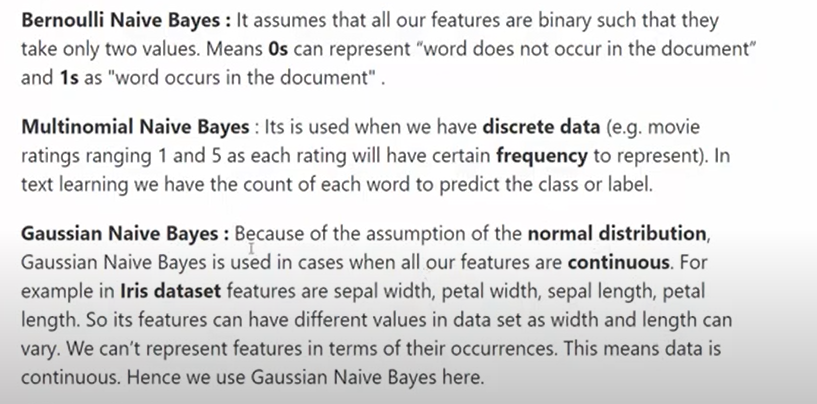

##### BernaoulliNaive Bayes:
When features and not the target are binary in nature.

##### Multinomial Naive Bayes
When we have discrete data

##### Gaussian Naive Bayes
When you have normal distribution or bell curve in features


In [201]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [202]:
emails = [
    'I am going to school',
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',
    'Upto 20% discount on parking,'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 0, 1, 1], dtype=int64)

In [203]:
# convert X_test into count
X_test_count = v.transform(X_test)
model.score(X_test_count,y_test)

0.9834888729361091

In [205]:
from sklearn.pipeline import Pipeline

In [210]:
# No need to convert X_train to X_train_count
# CountVectorizer internally converts it to vector and apply Naive Bayes


clf = Pipeline([
    ('Vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [211]:
clf.fit(X_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [212]:
clf.score(X_test,y_test)

0.9834888729361091

In [213]:
clf.predict(emails)

array([0, 0, 1, 1], dtype=int64)

In [215]:
from sklearn.datasets import load_wine
wine = load_wine()

In [216]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [224]:
wine.data[1]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

In [223]:
len(wine.data)

178

In [218]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [225]:
len(wine.feature_names)

13

In [220]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [226]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [227]:
len(wine.target)

178

In [228]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [229]:
df['target'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)

In [252]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [253]:
model.score(X_test,y_test)

0.9444444444444444

In [254]:
mn = MultinomialNB()
mn.fit(X_train,y_train)
mn.score(X_test,y_test)

0.9166666666666666